In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import analyze as a
import matplotlib.pyplot as plt
import numpy as np
import paper_plots as pp
import sweep_analyze as sa

AZ_antenna_axis = 0 deg
AZ_antenna_axis = 0 deg
AZ_antenna_axis = 0 deg


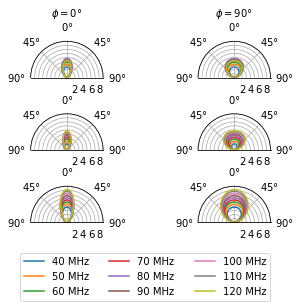

In [5]:
gl, f, fig, axs = a.polar_beam()

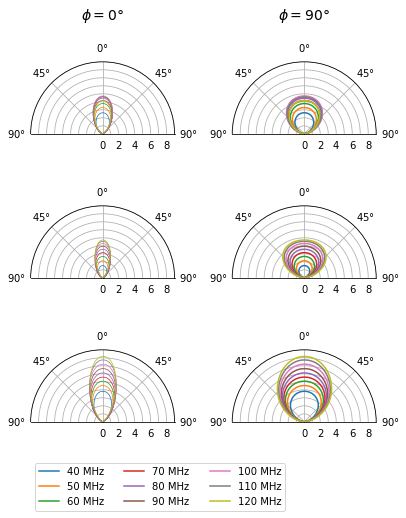

In [35]:
fig, axs = a.polar_beam(gl, f, (5, 2.5))

In [36]:
fig.savefig('beams_polar.pdf', bbox_inches='tight')

In [80]:
fig.savefig('plots/paper_figs/beams_polar.pdf', bbox_inches='tight')

In [82]:
f, t, l = a.get_ftl(0)
tsouth = a.get_ftl(0, 'sweep', '-24.0', return_fl=False)

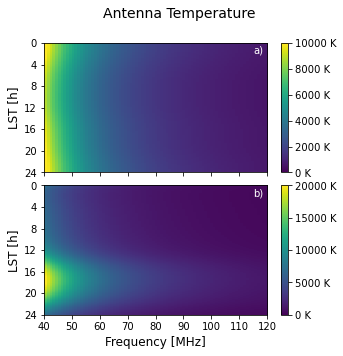

In [105]:
fig, axs = a.plot_temp_3d(f, l, t, tsouth)

In [106]:
fig.savefig('plots/paper_figs/temp3d.pdf', bbox_inches='tight')

In [201]:
rms_n = np.load('rms_snapshots_MARS.npy')

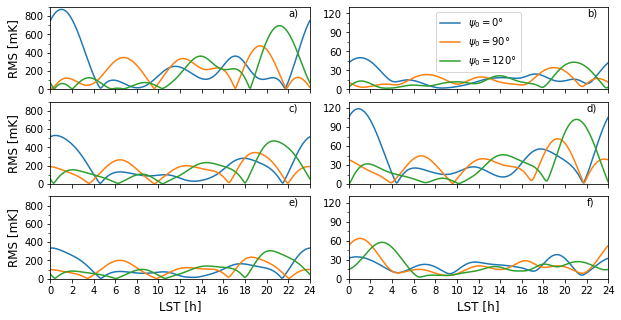

In [202]:
fig, axs = pp.plot_rms(rms_n, (10,5))

In [203]:
fig.savefig('plots/paper_figs/rms_mars.pdf', bbox_inches='tight')

In [204]:
rms_s = np.load('rms_snapshots_south.npy')

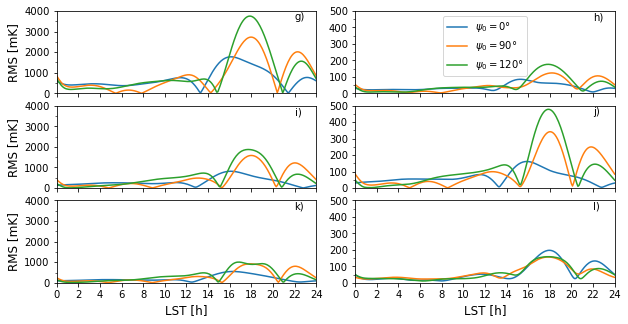

In [206]:
fig, axs = pp.plot_rms(rms_s, (10,5), False)

In [207]:
fig.savefig('plots/paper_figs/rms_south.pdf', bbox_inches='tight')

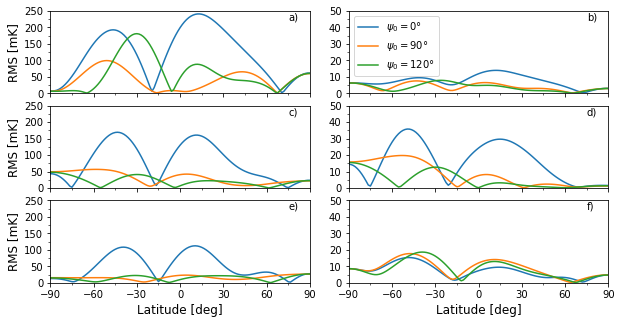

In [221]:
fig, axs = sa.rmsvslat()

In [222]:
fig.savefig('plots/paper_figs/rms_vs_lat.pdf', bbox_inches='tight')

In [234]:
gauss40 = np.empty((3, 2, 201, 201))
gauss80 = np.empty((3, 2, 201, 201))
gauss120 = np.empty((3, 2, 201, 201))
edges = np.empty((3, 2, 121, 201))

In [248]:
f, t, l = a.get_ftl(0, loc='sweep', sweep_lat=79.5, ground_plane=True, simulation='mini_MIST')
tmean = np.mean(t, axis=0)

In [249]:
all_arr = [gauss40, gauss80, gauss120, edges]
centres = [40, 80, 120]
for i, arr in enumerate(all_arr):
    print(i)
    if i < 3:
        ratio, ref = a.gaussian_rms(f, tmean, centre=centres[i])
    else:
        ratio, ref = a.EDGES_rms(f, tmean)
    arr[2, 0] = ratio

0
1
2
3


In [254]:
np.save('edges_ratios.npy', edges)

In [268]:
np.nanmax(gauss120)

64.32719455646397

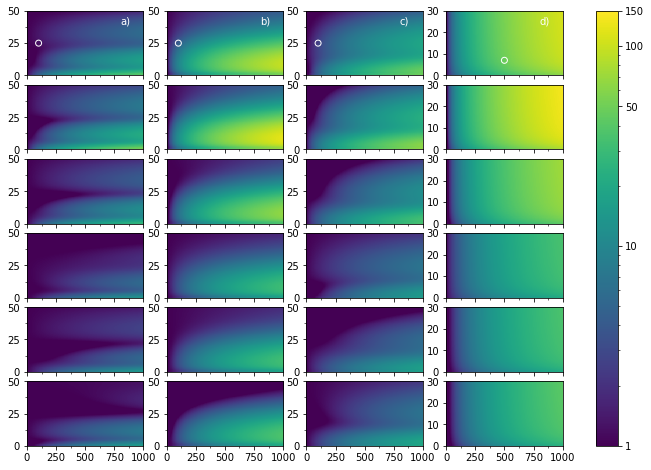

In [276]:
fig, axs = a.plot_gauss_edges(gauss40, gauss80, gauss120, edges)

In [277]:
fig.savefig('plots/paper_figs/mock_signal_ratios.pdf', bbox_inches='tight')